In [9]:
from pandas_datareader import data as wb
import datetime as dt
#import fix_yahoo_finance as yf
import numpy as np
import pandas as pd

In [8]:
#Create Multiple Portfolios
tickers = ["AAPL", "T", "JPM", "WFC", "V"]
data = pd.DataFrame()

for k in tickers:
    data[k] = wb.DataReader( k , data_source= "yahoo" , start="2017-01-01", end=dt.date.today())['Close']
print(data)

                  AAPL          T         JPM        WFC           V
Date                                                                
2017-01-03  116.150002  43.020000   87.230003  56.000000   79.500000
2017-01-04  116.019997  42.770000   86.910004  56.049999   80.150002
2017-01-05  116.610001  42.650002   86.110001  55.180000   81.089996
2017-01-06  117.910004  41.320000   86.120003  55.040001   82.209999
2017-01-09  118.989998  40.799999   86.180000  54.240002   81.750000
2017-01-10  119.110001  40.810001   86.430000  54.619999   81.309998
2017-01-11  119.750000  40.610001   87.080002  54.799999   81.800003
2017-01-12  119.250000  41.009998   86.239998  54.500000   81.370003
2017-01-13  119.040001  40.959999   86.699997  55.310001   81.169998
2017-01-17  120.000000  41.110001   83.550003  53.779999   81.260002
2017-01-18  119.989998  40.799999   83.940002  54.270000   81.589996
2017-01-19  119.779999  41.000000   83.300003  54.580002   81.730003
2017-01-20  120.000000  41.450001 

In [10]:
#Weights in each stock
weights = np.array([.2, .2, .2, .2, .2])
 
#initial investment
initial_investment = 100000

In [12]:
#Override API
# yf.pdr_override() 
 
# download Data
# data = pdr.get_data_yahoo(tickers, start="2017-01-01", end=dt.date.today())['Close']

In [13]:
#Calculate periodic returns
returns = data.pct_change()
 
#Generate Var-Cov matrix
cov_matrix = returns.cov()

In [15]:
#Calculate mean returns for each stock
avg_rets = returns.mean()
avg_rets

AAPL    0.001201
T      -0.000284
JPM     0.000373
WFC    -0.000442
V       0.001096
dtype: float64

In [16]:
#Calculate Portfolio Mean
port_mean = avg_rets.dot(weights)
port_mean

0.0003887530892081647

In [17]:
#Calculate Portfolio STDEV
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
port_stdev
 

0.0150865339152086

In [18]:
#Mean Investment
mean_investment = (1+port_mean) * initial_investment
mean_investment

100038.87530892082

In [19]:
#Standard Deviation Investment
stdev_investment = initial_investment * port_stdev
stdev_investment

1508.6533915208602

In [20]:
#Cutoff Point 
conf_level0 = 0.001
conf_level1 = 0.01
conf_level2 = 0.05

In [22]:
from scipy.stats import norm

In [21]:
cutoff0 = norm.ppf(conf_level0, mean_investment, stdev_investment)
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
cutoff2 = norm.ppf(conf_level2, mean_investment, stdev_investment)

In [23]:
#Calculate PDF (If Desired)
#print(norm.cdf(cutoff0, mean_investment, stdev_investment))
 
#Calculate 1 Day VaR at different confidence intervals 
var_1d0 = initial_investment - cutoff0
var_1d1 = initial_investment - cutoff1
var_1d2 = initial_investment - cutoff2

#-------------------------Optional--------------------------#

In [32]:
#Calculate n Day VaR in loop
num_days = 100
df = pd.DataFrame()
for x in range(1, num_days):    
    z = (str(x) + " day VaR at 99.99% confidence level: " + str(np.round(var_1d0 * np.sqrt(x),2)))
    print(z)

1 day VaR at 99.99% confidence level: 4623.21
2 day VaR at 99.99% confidence level: 6538.21
3 day VaR at 99.99% confidence level: 8007.64
4 day VaR at 99.99% confidence level: 9246.43
5 day VaR at 99.99% confidence level: 10337.82
6 day VaR at 99.99% confidence level: 11324.52
7 day VaR at 99.99% confidence level: 12231.87
8 day VaR at 99.99% confidence level: 13076.42
9 day VaR at 99.99% confidence level: 13869.64
10 day VaR at 99.99% confidence level: 14619.89
11 day VaR at 99.99% confidence level: 15333.47
12 day VaR at 99.99% confidence level: 16015.28
13 day VaR at 99.99% confidence level: 16669.24
14 day VaR at 99.99% confidence level: 17298.48
15 day VaR at 99.99% confidence level: 17905.63
16 day VaR at 99.99% confidence level: 18492.86
17 day VaR at 99.99% confidence level: 19062.0
18 day VaR at 99.99% confidence level: 19614.64
19 day VaR at 99.99% confidence level: 20152.12
20 day VaR at 99.99% confidence level: 20675.64
21 day VaR at 99.99% confidence level: 21186.23
22 day

In [34]:
#Plot Results On Bar Chart
import matplotlib.pyplot as plt
import pandas as pd
 
data = {'99.99%': np.round(var_1d0,2), '99%': np.round(var_1d1, 2), '95%': np.round(var_1d2, 2)}
df = pd.DataFrame(data,index=[0]) 
df

,99.99%,99%,95%
0,4623.21,3470.78,2442.64


## VaR - Value at Risk

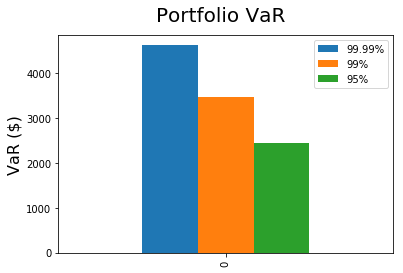

In [35]:
df.plot(kind = 'bar')
plt.suptitle('Portfolio VaR', fontsize=20)
plt.ylabel('VaR ($)', fontsize=16)
plt.show()        